In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('./data/penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [39]:
df.shape

(344, 17)

In [40]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [42]:
numericalCol = 0
categoricalCol = 0

numericalColList = []
categoricalColList = []

for col in df.columns:
    if df[col].dtype == 'object':
        categoricalCol += 1
        categoricalColList.append(col)
    else:
        numericalCol += 1
        numericalColList.append(col)

In [43]:
print("Numerical columns = ", numericalCol, " : ", numericalColList)
print("Categorical columns = ", categoricalCol, " : ", categoricalColList)

Numerical columns =  7  :  ['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
Categorical columns =  10  :  ['studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex', 'Comments']


In [44]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.000000,63.151163,40.430199,1.000000,29.000000,58.000000,95.250000,152.000000
Culmen Length (mm),342.000000,43.921930,5.459584,32.100000,39.225000,44.450000,48.500000,59.600000
Culmen Depth (mm),342.000000,17.151170,1.974793,13.100000,15.600000,17.300000,18.700000,21.500000
Flipper Length (mm),342.000000,200.915205,14.061714,172.000000,190.000000,197.000000,213.000000,231.000000
Body Mass (g),342.000000,4201.754386,801.954536,2700.000000,3550.000000,4050.000000,4750.000000,6300.000000
Delta 15 N (o/oo),330.000000,8.733382,0.551770,7.632200,8.299890,8.652405,9.172123,10.025440
Delta 13 C (o/oo),331.000000,-25.686292,0.793961,-27.018540,-26.320305,-25.833520,-25.062050,-23.787670


In [45]:
for i in categoricalColList:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

studyName
3
studyName
PAL0910    120
PAL0809    114
PAL0708    110
Name: count, dtype: int64


Species
3
Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64


Region
1
Region
Anvers    344
Name: count, dtype: int64


Island
3
Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


Stage
1
Stage
Adult, 1 Egg Stage    344
Name: count, dtype: int64


Individual ID
190
Individual ID
N61A2    3
N29A2    3
N22A1    3
N22A2    3
N23A1    3
        ..
N10A1    1
N10A2    1
N84A2    1
N84A1    1
N43A2    1
Name: count, Length: 190, dtype: int64


Clutch Completion
2
Clutch Completion
Yes    308
No      36
Name: count, dtype: int64


Date Egg
50
Date Egg
11/27/07    18
11/9/08     16
11/16/07    16
11/18/09    14
11/4/08     12
11/6/08     12
11/13/08    12
11/21/09    12
11/29/07    10
11/27/09    10
11/15/09    10
11/14/08    10
11/16/09

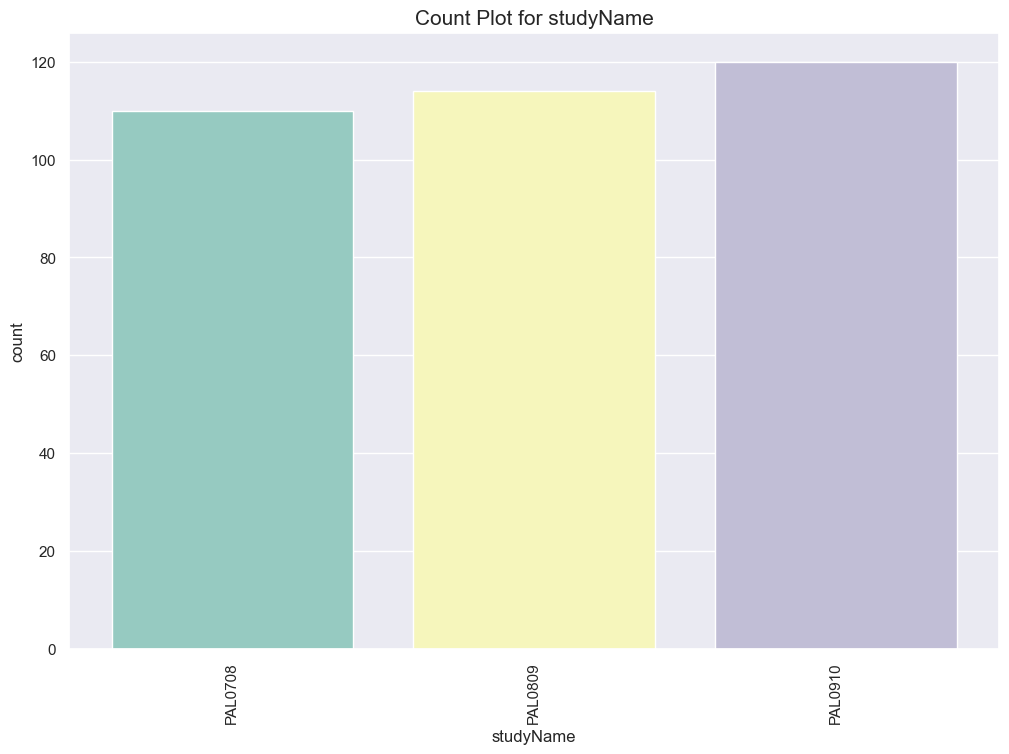

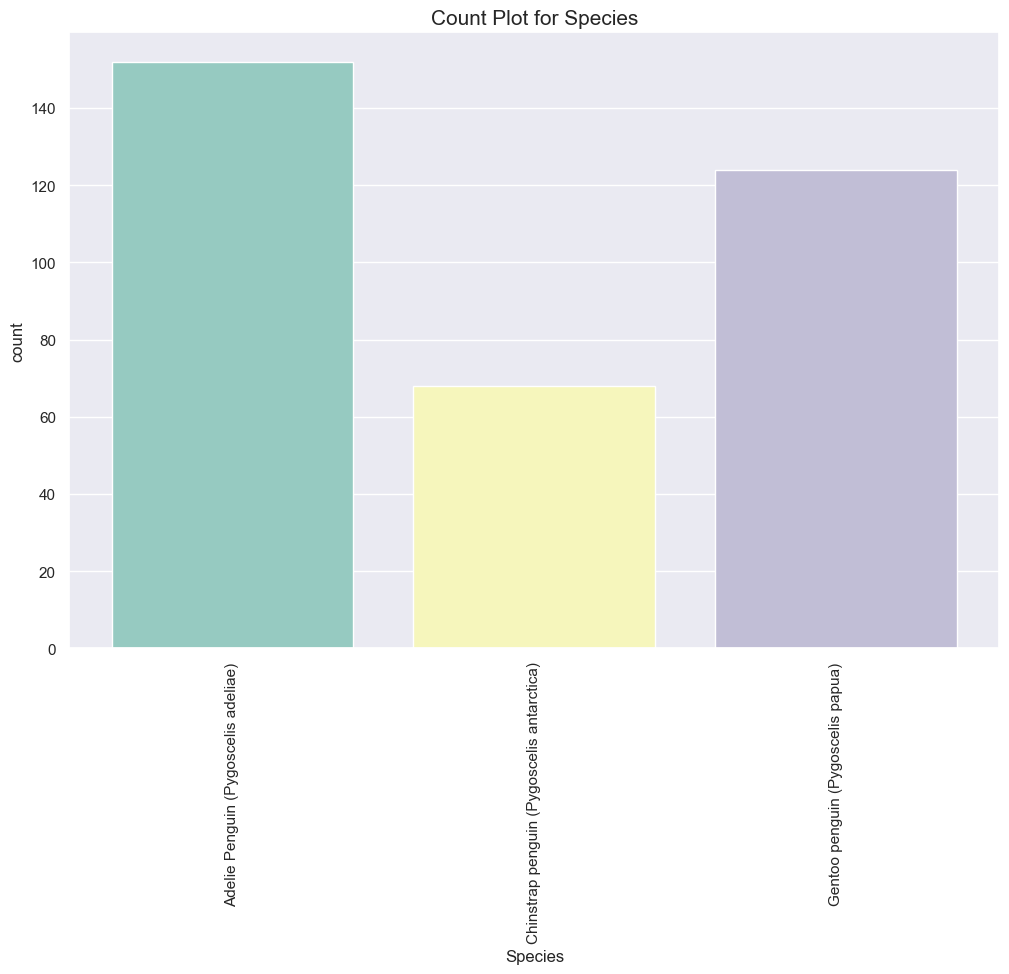

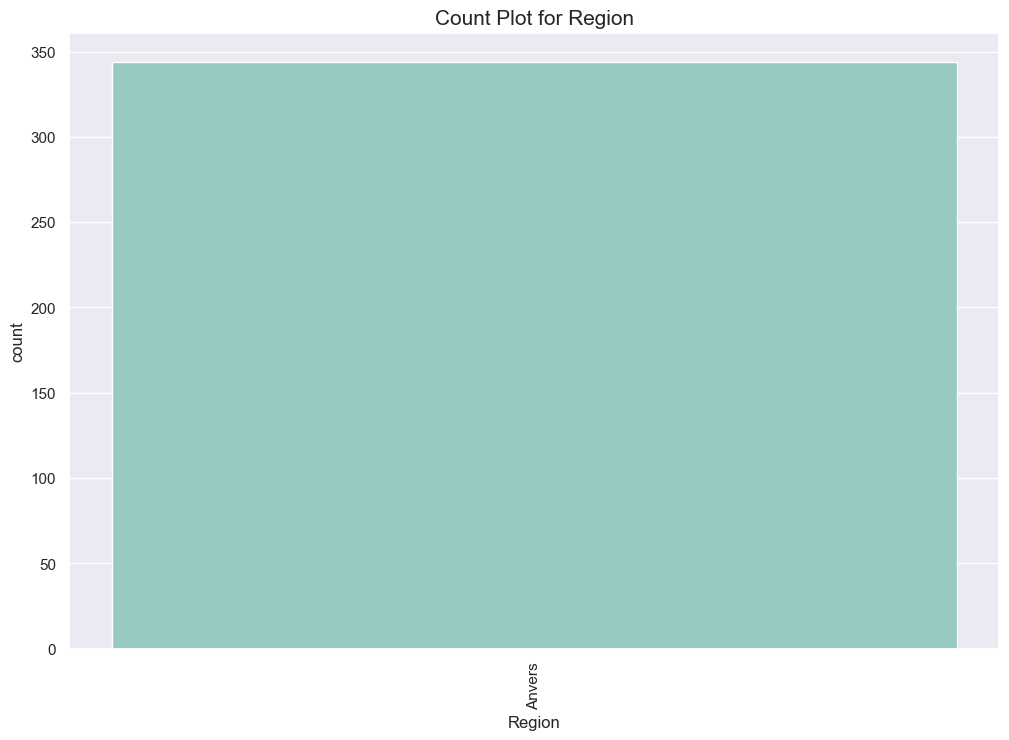

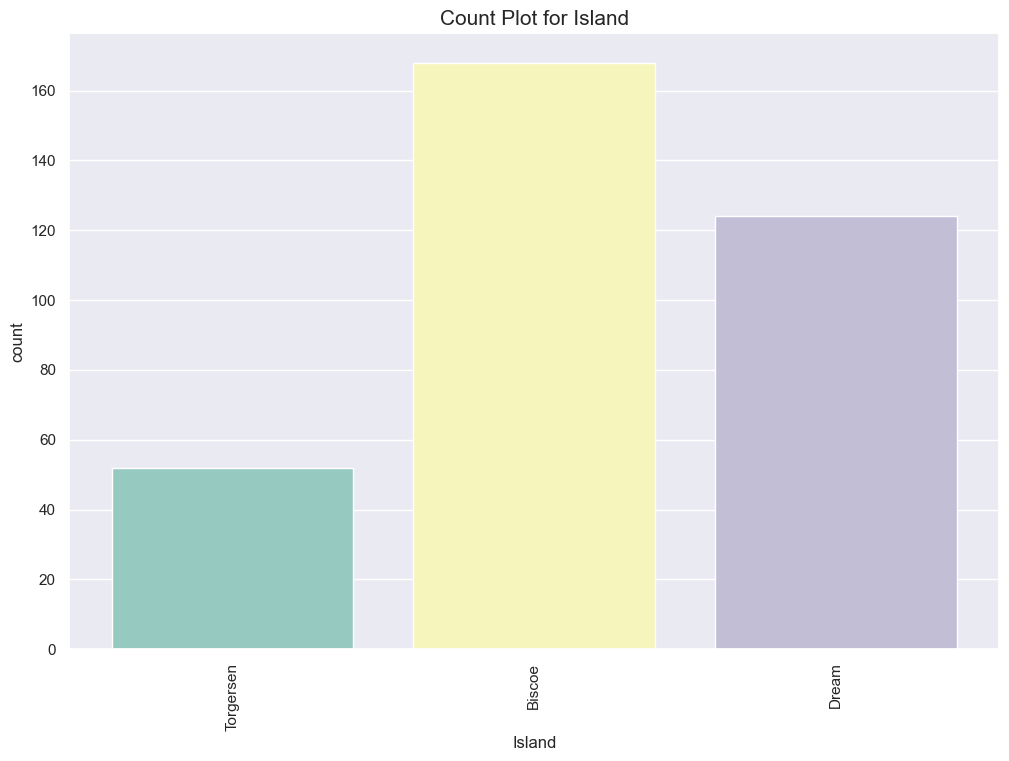

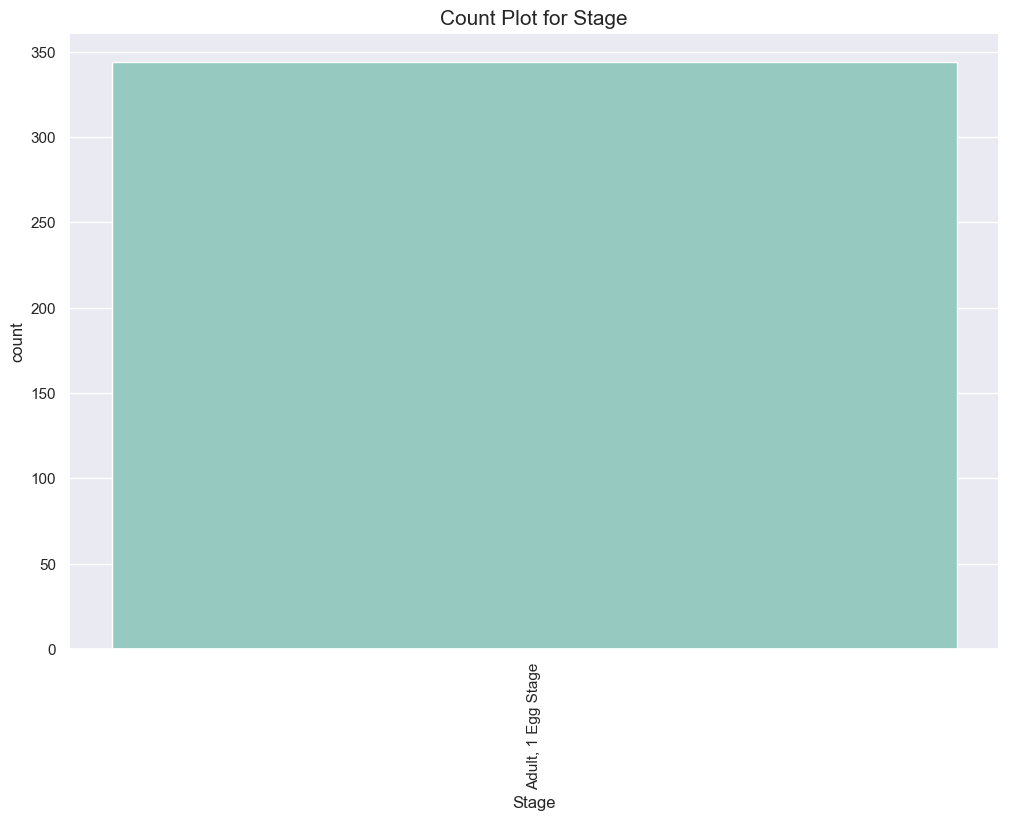

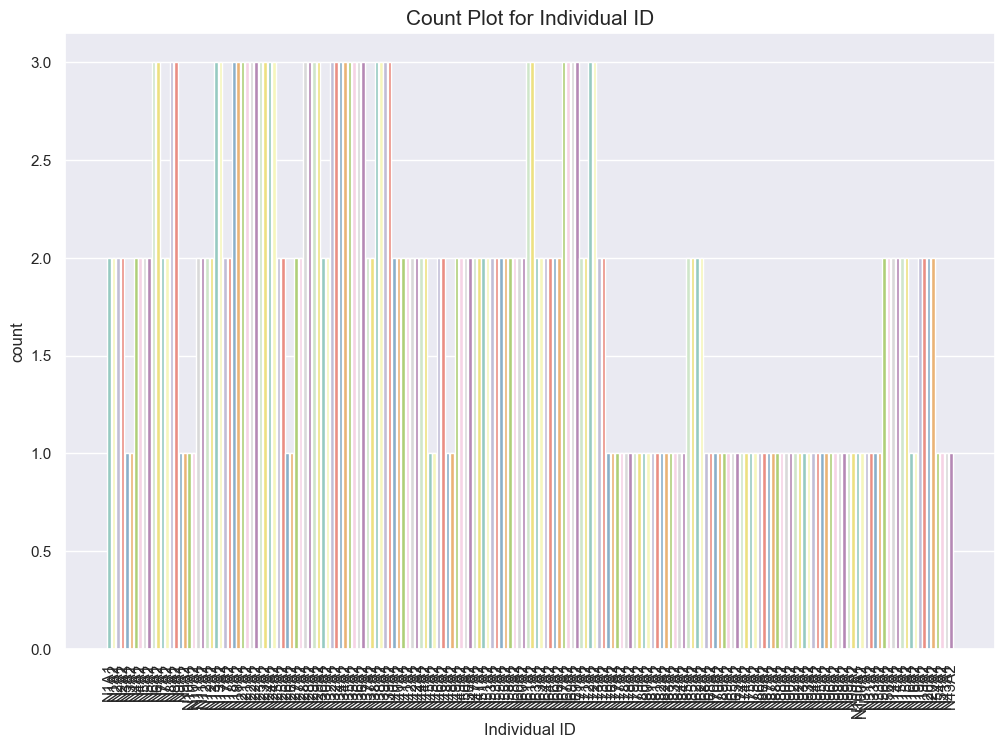

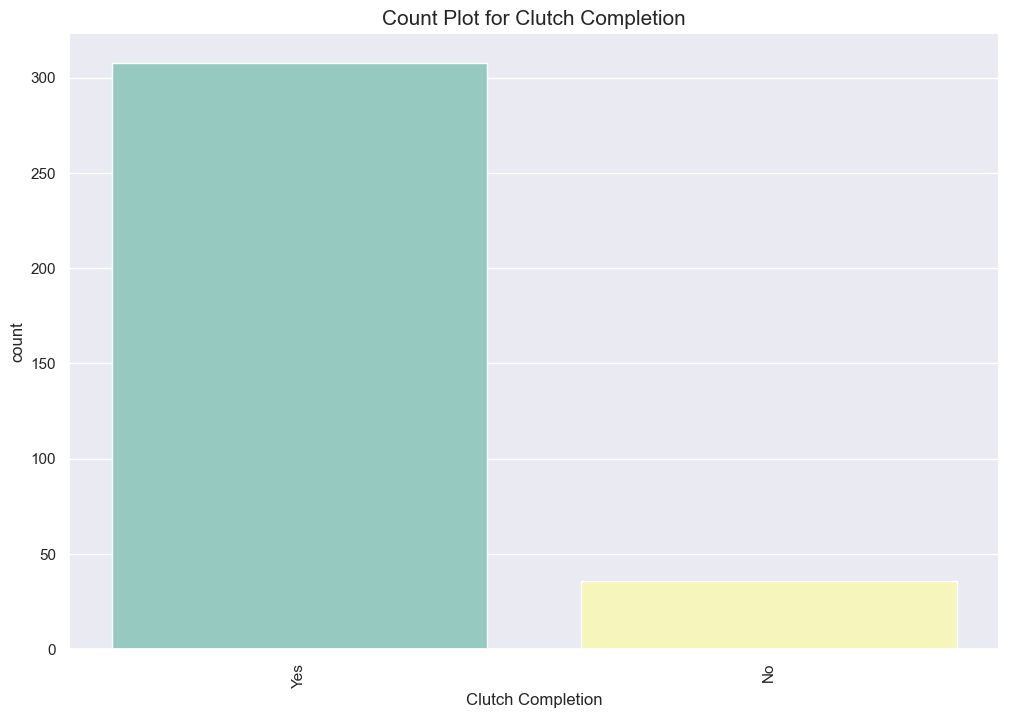

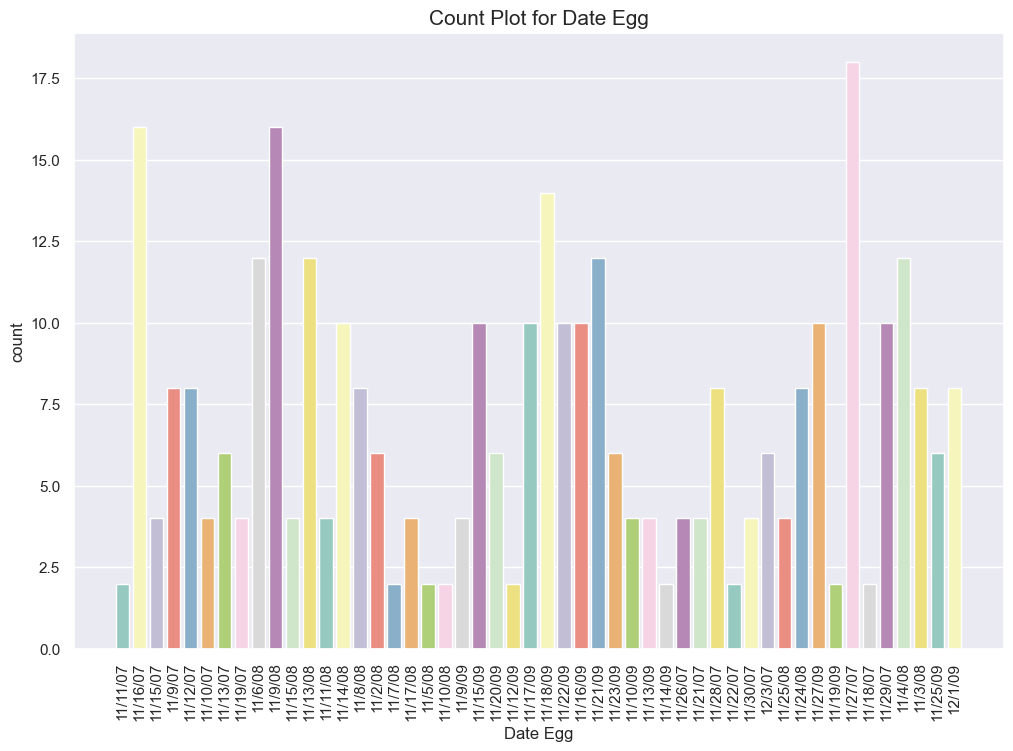

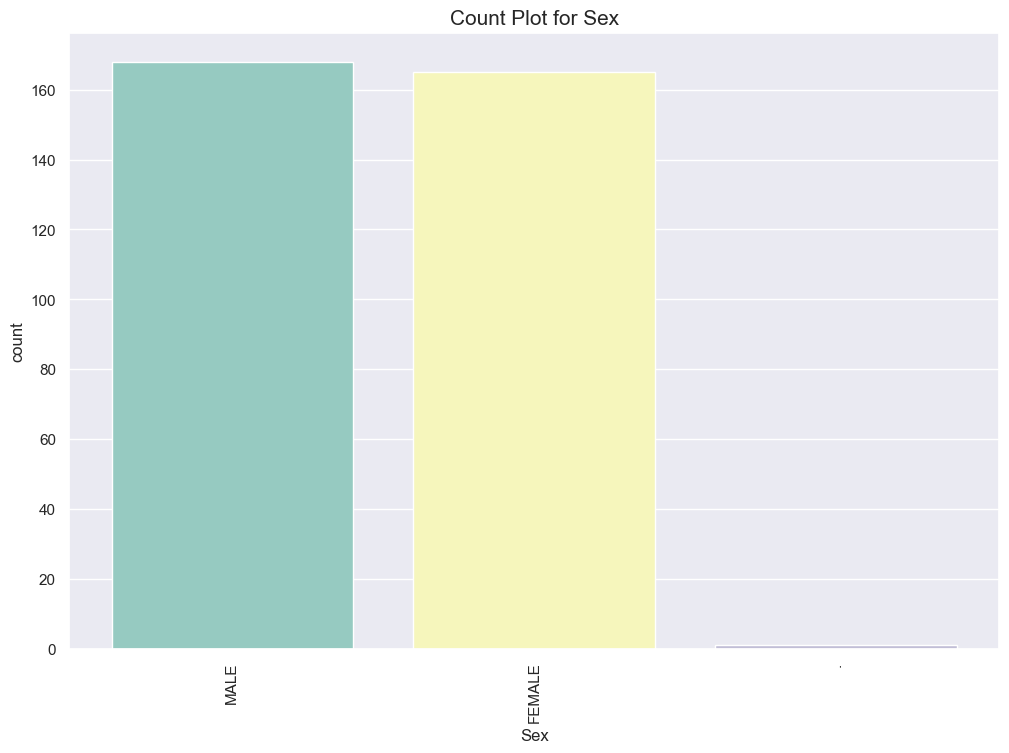

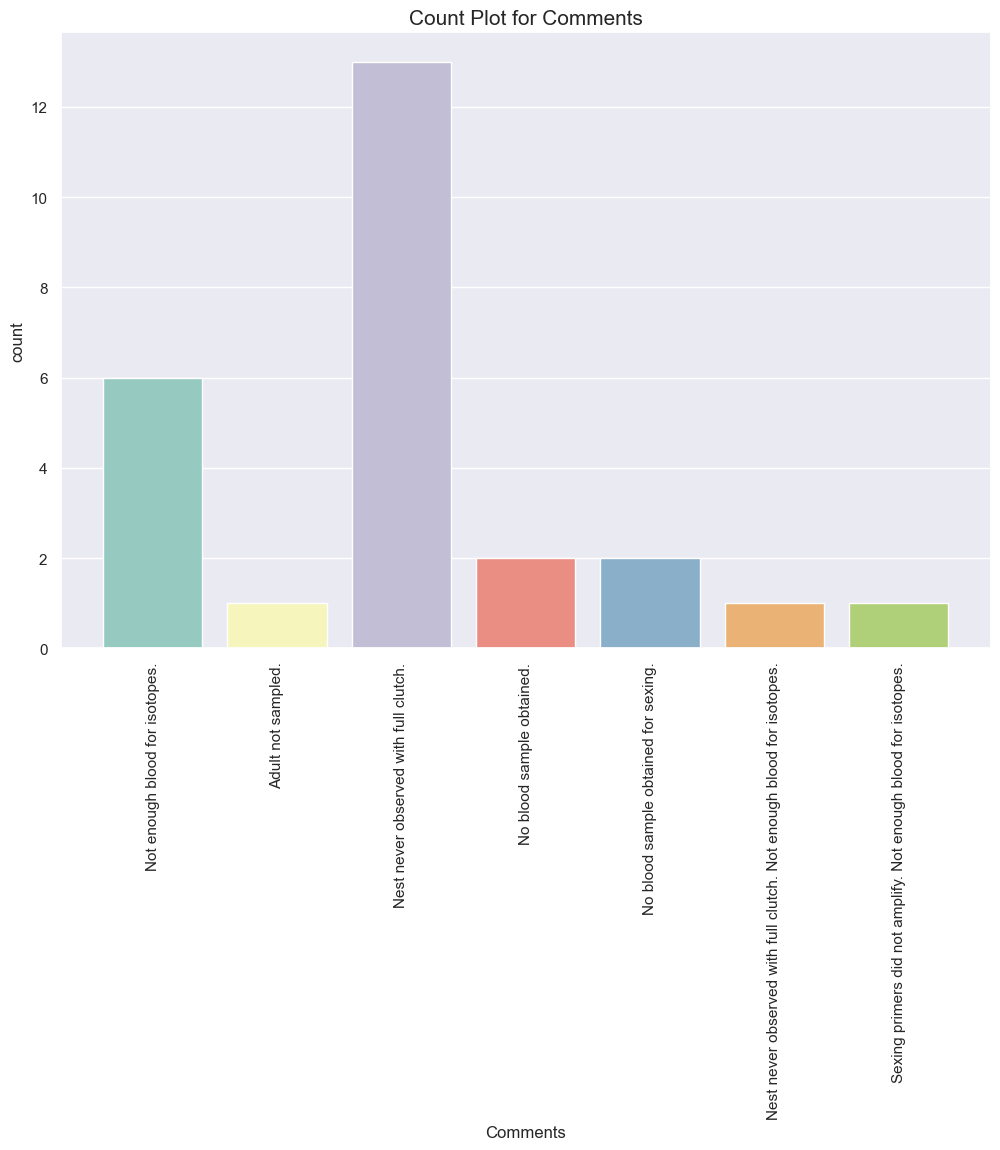

In [46]:
for i in categoricalColList:
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="darkgrid")     # other option is whitegrid
    sns.countplot(x=i, data=df, palette="Set3")
    plt.xticks(rotation=90)
    plt.title(f"Count Plot for {i}", fontsize=15)
    plt.plot()
    plt.show()

<Figure size 1200x800 with 0 Axes>

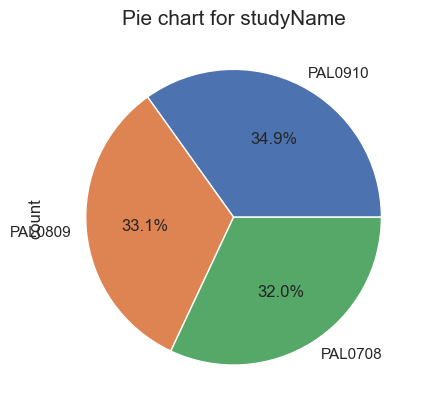

<Figure size 1200x800 with 0 Axes>

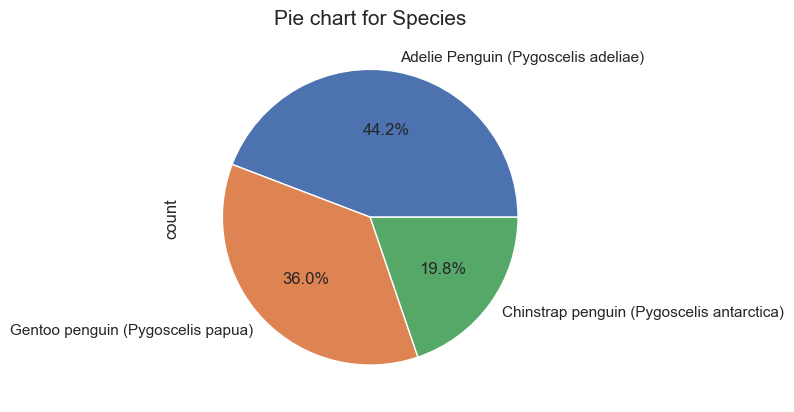

<Figure size 1200x800 with 0 Axes>

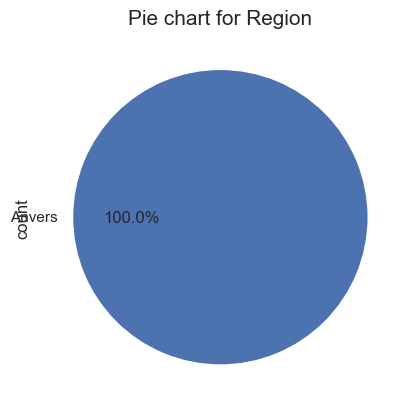

<Figure size 1200x800 with 0 Axes>

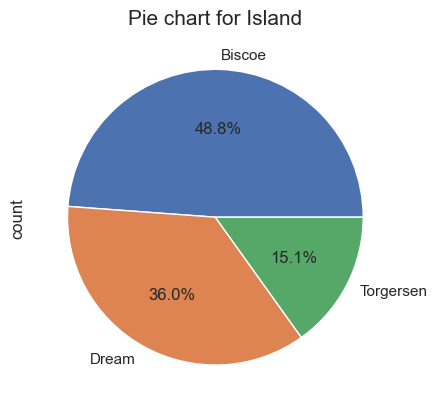

<Figure size 1200x800 with 0 Axes>

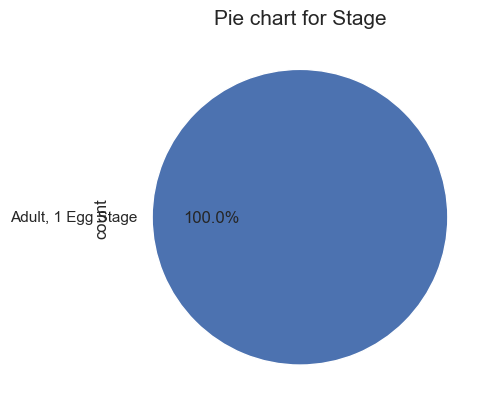

<Figure size 1200x800 with 0 Axes>

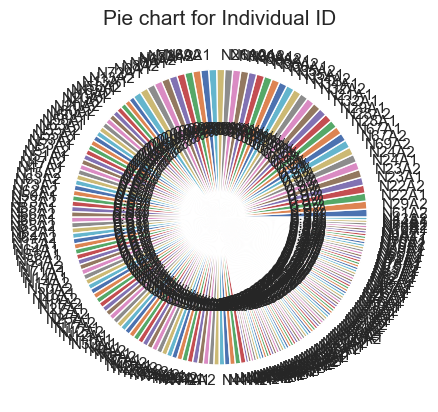

<Figure size 1200x800 with 0 Axes>

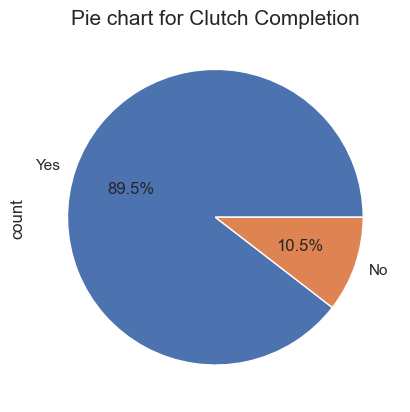

<Figure size 1200x800 with 0 Axes>

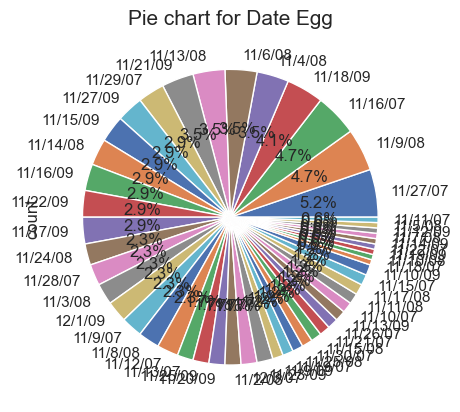

<Figure size 1200x800 with 0 Axes>

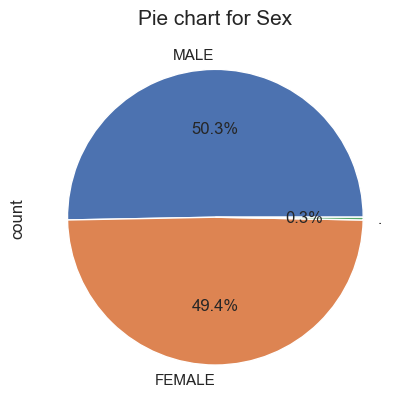

<Figure size 1200x800 with 0 Axes>

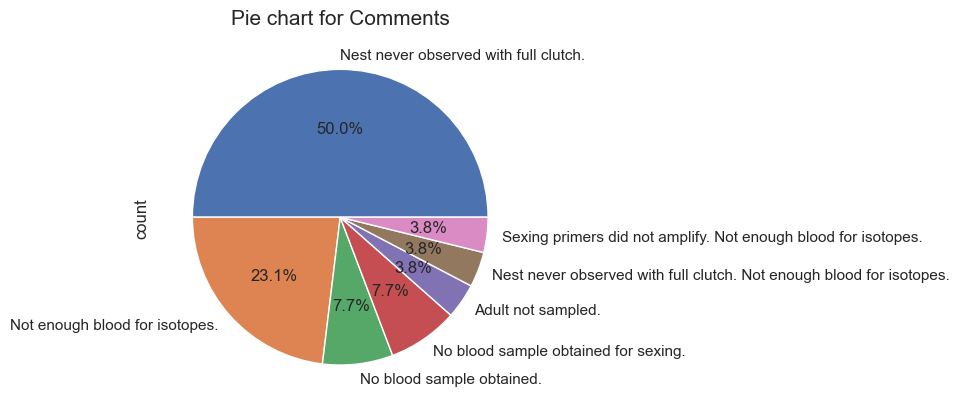

In [47]:
for i in categoricalColList:
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="whitegrid")     # other option is darkgrid
    countsDF = pd.DataFrame(df[i].value_counts())
    plot = countsDF.plot.pie(subplots=True, labels=countsDF.index, legend=False, autopct='%1.1f%%')
    plt.xticks(rotation=90)
    plt.title(f"Pie chart for {i}", fontsize=15)
    plt.plot()
    plt.show()

Sample Number


<Figure size 1200x800 with 0 Axes>

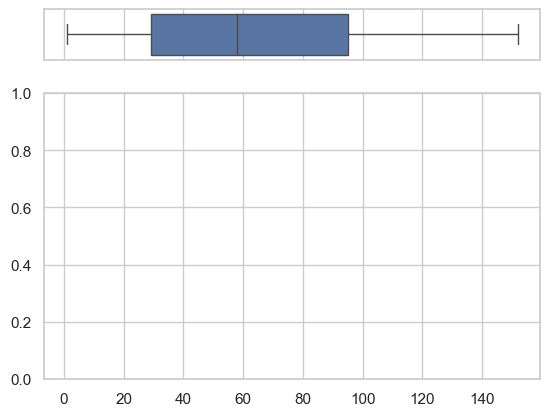

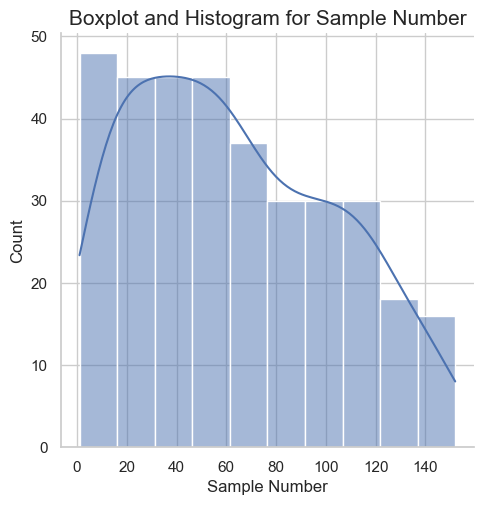

Culmen Length (mm)


<Figure size 1200x800 with 0 Axes>

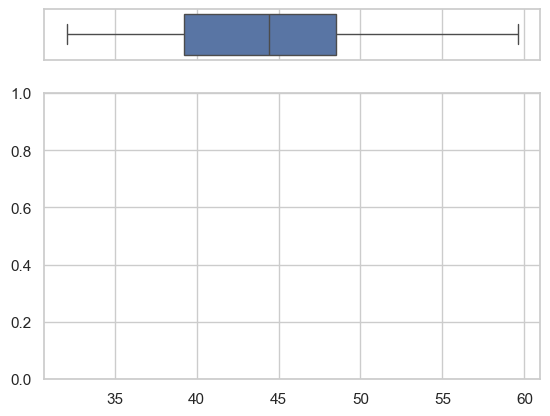

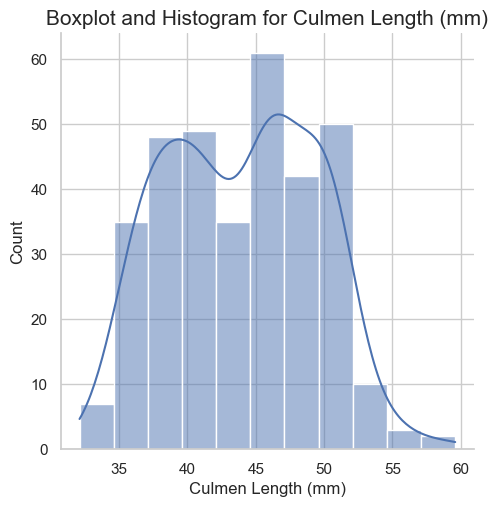

Culmen Depth (mm)


<Figure size 1200x800 with 0 Axes>

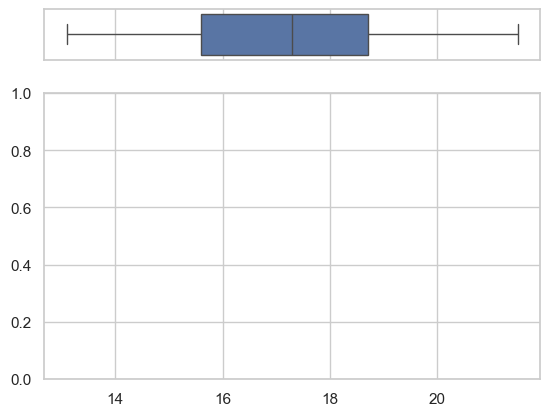

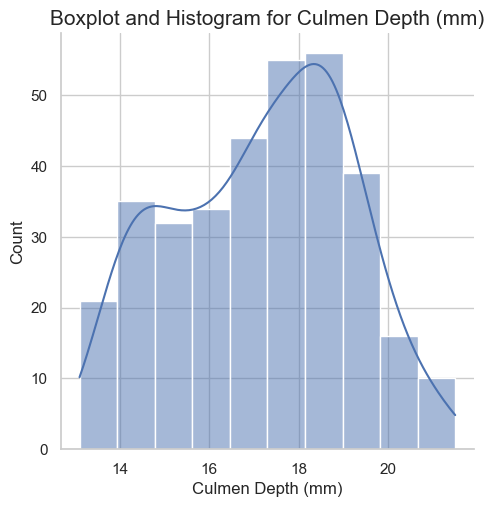

Flipper Length (mm)


<Figure size 1200x800 with 0 Axes>

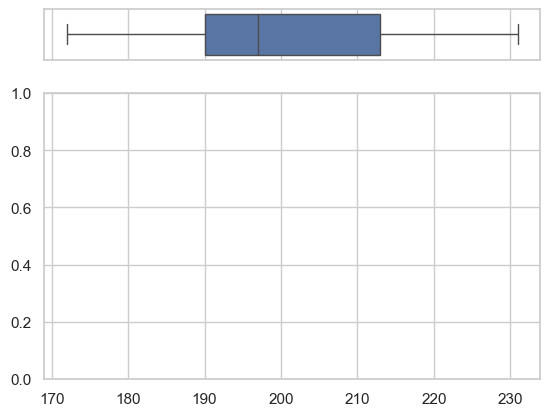

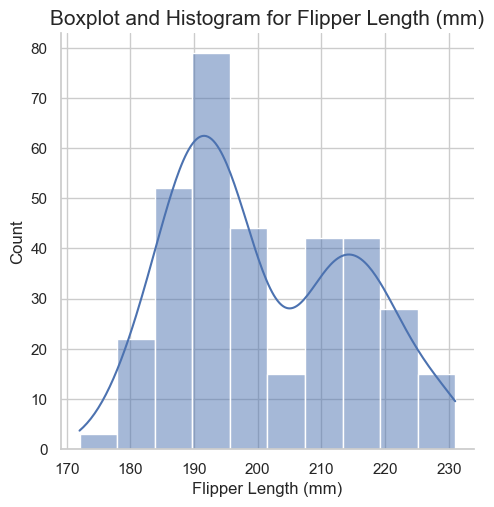

Body Mass (g)


<Figure size 1200x800 with 0 Axes>

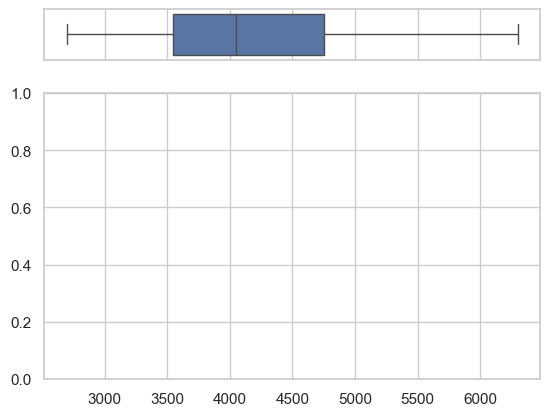

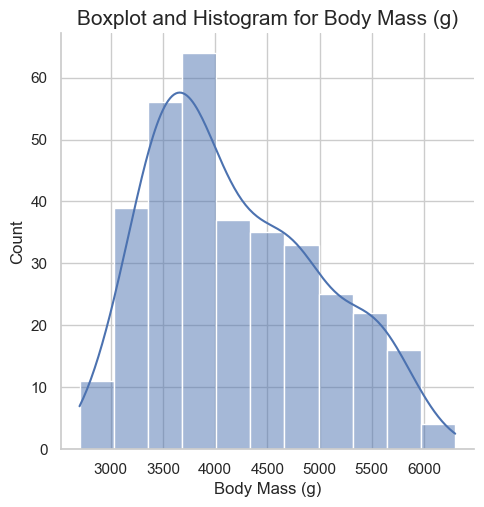

Delta 15 N (o/oo)


<Figure size 1200x800 with 0 Axes>

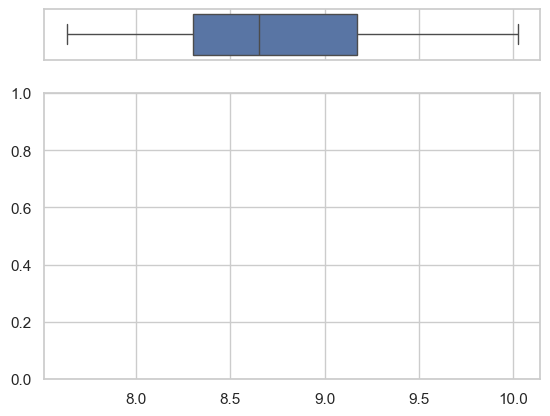

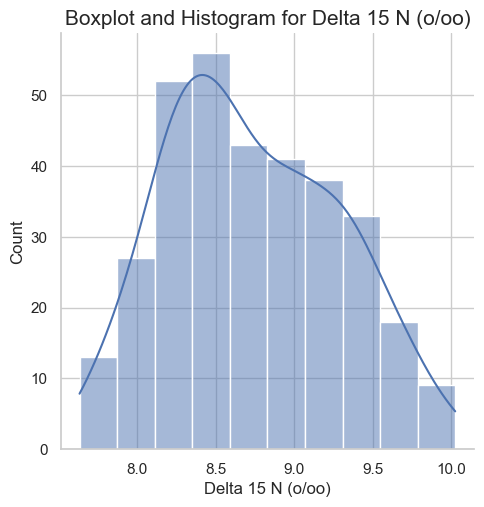

Delta 13 C (o/oo)


<Figure size 1200x800 with 0 Axes>

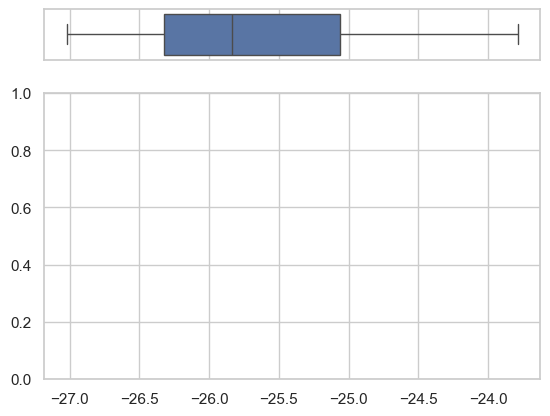

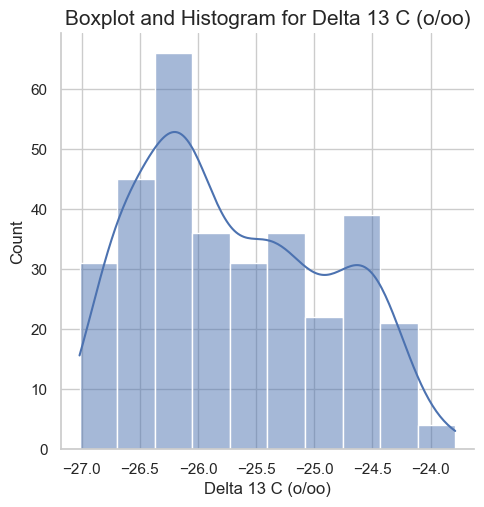

In [48]:
for i in numericalColList:
    print(i)
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="whitegrid")     # other option is darkgrid
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=i, ax=ax_box)
    sns.displot(data=df, x=i, ax=ax_hist, kde=True)
    ax_box.set(xlabel='')
    plt.title(f"Boxplot and Histogram for {i}", fontsize=15)
    plt.plot()
    plt.show()